In [2]:
import matplotlib.pyplot as plt 
import numpy as np


In [3]:
byte_distribution_no_zero = np.load('byte_prob_distr_no_zero.npy')

In [21]:
PX100W_csv = byte_distribution_no_zero[83] # Single row corresponds to PX100W.csv
PS86_map_png = byte_distribution_no_zero[868] # Corresponds to PS86_MAP.png
PDF_heron = byte_distribution_no_zero[922] # Corresponds to 09FS20091009_heron_1.pdf

print(PX100W_csv.size)
print(PS86_map_png.size)
print(PDF_heron.size)



255
255
255


In [22]:
def generate_plot(distr, plot_title, top_n=10):
    ind = np.argpartition(distr, -top_n)[-top_n:]
    ind = ind[np.argsort(distr[ind])]
    
    plt.bar(range(ind.size), distr[ind], align='center', tick_label=ind)
    plt.xlabel('Byte Value (in decimal)')
    plt.ylabel('Proportion of file')
    plt.title(plot_title)
    plt.show()




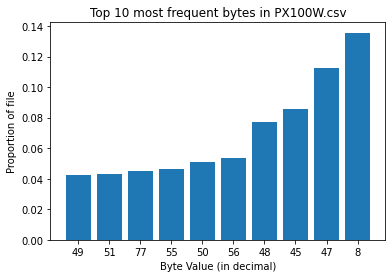

In [20]:
generate_plot(PX100W_csv, 'Top 10 most frequent bytes in PX100W.csv')

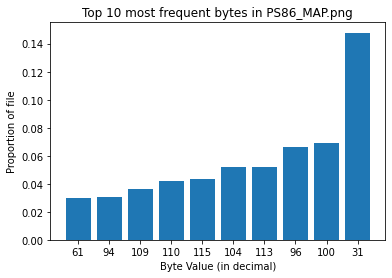

In [23]:
generate_plot(PS86_map_png, 'Top 10 most frequent bytes in PS86_MAP.png')

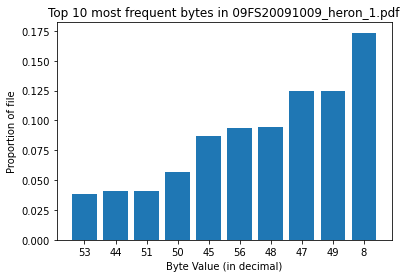

In [24]:
generate_plot(PDF_heron, 'Top 10 most frequent bytes in 09FS20091009_heron_1.pdf')

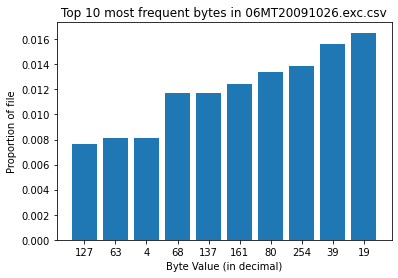

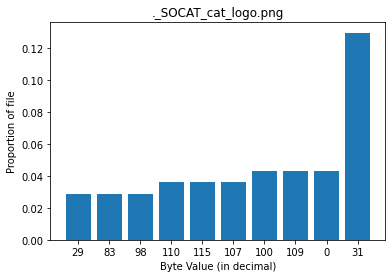

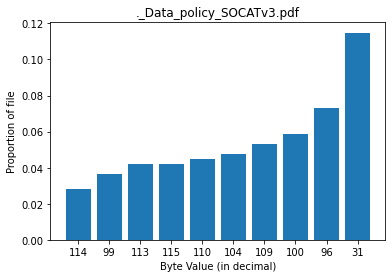

In [25]:
# Doing some more validation with other files of same types

MT_csv = byte_distribution_no_zero[1852] # Corresponds to 06MT20091026.exc.csv
SOCAT_png = byte_distribution_no_zero[6034] # Corresponds to ._SOCAT_cat_logo.png
SOCAT_pdf = byte_distribution_no_zero[6041] # Corresponds to ._Data_policy_SOCATv3.pdf

generate_plot(MT_csv, 'Top 10 most frequent bytes in 06MT20091026.exc.csv')
generate_plot(SOCAT_png, '._SOCAT_cat_logo.png')
generate_plot(SOCAT_pdf, '._Data_policy_SOCATv3.pdf')
